# Assignment 4

In [50]:
import networkx as nx
import pandas as pd
import numpy as np
import pickle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.preprocessing import (StandardScaler, MinMaxScaler)
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

## ***First question is done :)***

---

## Part 1 - Random Graph Identification

For the first part of this assignment you will analyze randomly generated graphs and determine which algorithm created them.

In [2]:
G1 = pickle.load(open("assets/A4_P1_G1", mode = "rb"))
G2 = pickle.load(open("assets/A4_P1_G2", mode = "rb"))
G3 = pickle.load(open("assets/A4_P1_G3", mode = "rb"))
G4 = pickle.load(open("assets/A4_P1_G4", mode = "rb"))
G5 = pickle.load(open("assets/A4_P1_G5", mode = "rb"))
P1_Graphs = [G1, G2, G3, G4, G5]

In [3]:
with open("assets/A4_P1_G1", mode = "rb") as file:
    graph = pickle.load(file)

In [4]:
P1_Graphs

<br>
`P1_Graphs` is a list containing 5 networkx graphs. Each of these graphs were generated by one of three possible algorithms:
* Preferential Attachment (`'PA'`)
* Small World with low probability of rewiring (`'SW_L'`)
* Small World with high probability of rewiring (`'SW_H'`)

Anaylze each of the 5 graphs using any methodology and determine which of the three algorithms generated each graph.

*The `graph_identification` function should return a list of length 5 where each element in the list is either `'PA'`, `'SW_L'`, or `'SW_H'`.*

In [5]:
# all have 1000 nodes!

[(graph.number_of_nodes(), graph.number_of_edges()) for graph in P1_Graphs]

[(1000, 999), (1000, 2000), (1000, 2000), (1000, 999), (1000, 2000)]

In [6]:
sorted(nx.preferential_attachment(G1), reverse = True, key = lambda tup: tup[2]);

In [7]:
[nx.average_clustering(graph) for graph in P1_Graphs]

[0.0, 0.49310000000000004, 0.4897333333333334, 0.0, 0.36504285714285717]

In [8]:
[nx.average_shortest_path_length(graph) for graph in P1_Graphs]

[6.530506506506507,
 43.80284684684685,
 39.007695695695695,
 8.158990990990992,
 8.532046046046046]

In [9]:
G1.degree();

In [10]:
def plot_degree_distribution(graph) -> None:
    
    nnodes = graph.number_of_nodes()
    ddist = Counter([degree for (node, degree) in graph.degree()])
    
    fig, axes = plt.subplots(nrows = 1, ncols = 1)
    fig.set_size_inches(5, 5)
    axes.plot(ddist.keys(), ddist.values(), color = "red", marker = "o", linestyle = "None", markeredgecolor = "black")
    axes.set_xlabel("Degrees")
    axes.set_xscale("log")
    axes.set_yscale("log")
    axes.set_ylabel("Fraction of nodes")
    plt.show()

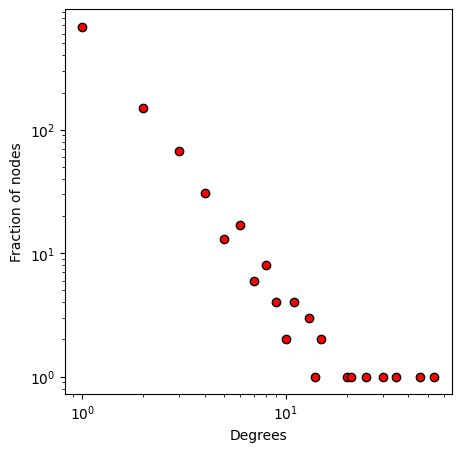

In [11]:
plot_degree_distribution(G1)

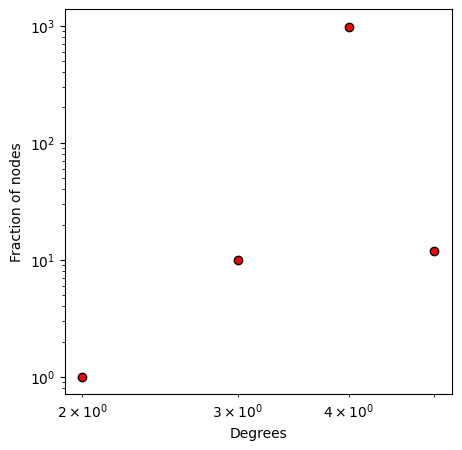

In [12]:
plot_degree_distribution(G2)

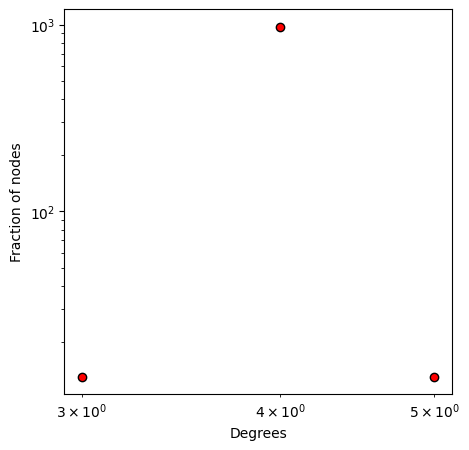

In [13]:
plot_degree_distribution(G3)

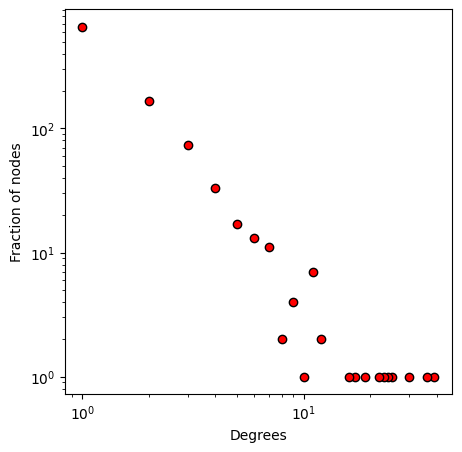

In [14]:
plot_degree_distribution(G4)

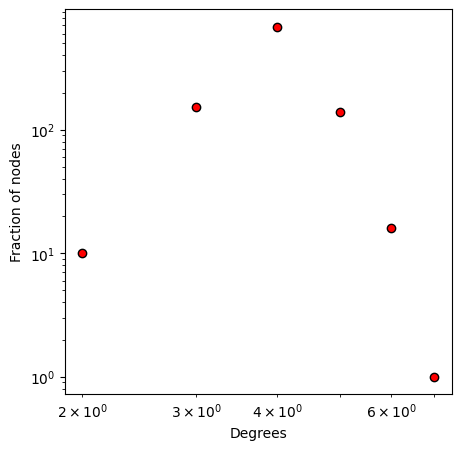

In [15]:
plot_degree_distribution(G5)

In [16]:
# graphs G1 and G4 show Power law distribution.

In [17]:
# So, the graphs G2, G3 and G5 must be small world networks.
# With high probability for rewiring, we'd end up with a messy graph with low clustering coefficient (due to the loss of initial structure) 
# and small average shortest path length
# With low probability of rewiring, we'd get a graph with high clustering coefficient but large average shortest path length.

In [18]:
[(nx.average_clustering(graph), nx.average_shortest_path_length(graph)) for graph in P1_Graphs]

[(0.0, 6.530506506506507),
 (0.49310000000000004, 43.80284684684685),
 (0.4897333333333334, 39.007695695695695),
 (0.0, 8.158990990990992),
 (0.36504285714285717, 8.532046046046046)]

In [19]:
# Preferential attachment - nx.barabasi_albert_graph
# Samll World - nx.watts_strogatz_graph

def graph_identification():
    return ["PA", "SW_L", "SW_L", "PA", "SW_H"]

In [20]:
ans_one = graph_identification()
assert type(ans_one) == list, "You must return a list"


---

## Part 2 - Company Emails

For the second part of this assignment you will be working with a company's email network where each node corresponds to a person at the company, and each edge indicates that at least one email has been sent between two people.

The network also contains the node attributes `Department` and `ManagmentSalary`.

`Department` indicates the department in the company which the person belongs to, and `ManagmentSalary` indicates whether that person is receiving a managment position salary.

In [18]:
G = pickle.load(open('assets/email_prediction_NEW.txt', 'rb'))

print(f"Graph with {len(nx.nodes(G))} nodes and {len(nx.edges(G))} edges")

Graph with 1005 nodes and 16706 edges


### Part 2A - Salary Prediction

Using network `G`, identify the people in the network with missing values for the node attribute `ManagementSalary` and predict whether or not these individuals are receiving a managment position salary.

To accomplish this, you will need to create a matrix of node features of your choice using networkx, train a sklearn classifier on nodes that have `ManagementSalary` data, and predict a probability of the node receiving a managment salary for nodes where `ManagementSalary` is missing.



Your predictions will need to be given as the probability that the corresponding employee is receiving a managment position salary.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).

Your grade will be based on the AUC score computed for your classifier. A model which with an AUC of 0.75 or higher will recieve full points.

Using your trained classifier, return a Pandas series of length 252 with the data being the probability of receiving managment salary, and the index being the node id.

    Example:
    
        1       1.0
        2       0.0
        5       0.8
        8       1.0
            ...
        996     0.7
        1000    0.5
        1001    0.0
        Length: 252, dtype: float64

In [3]:
nx.is_directed(G)

False

In [4]:
np.mean([G.degree()[node] for node in G.nodes() if nx.get_node_attributes(G, "ManagementSalary")[node] == 1])

81.94117647058823

In [59]:
np.mean([G.degree()[node] for node in G.nodes() if nx.get_node_attributes(G, "ManagementSalary")[node] == 0])

24.613564668769715

In [23]:
list(G.nodes(data=True))[:5] # print the first 5 nodes

[(0, {'Department': 1, 'ManagementSalary': 0.0}),
 (1, {'Department': 1, 'ManagementSalary': nan}),
 (581, {'Department': 3, 'ManagementSalary': 0.0}),
 (6, {'Department': 25, 'ManagementSalary': 1.0}),
 (65, {'Department': 4, 'ManagementSalary': nan})]

In [7]:
list(nx.neighbors(G, 1));

In [8]:
dep = nx.get_node_attributes(G, "Department");
mgmt_salary = nx.get_node_attributes(G, "ManagementSalary");
degrees = dict(nx.degree(G));

In [68]:
pd.DataFrame([dep, mgmt_salary, degrees, neighbours_with_mgmt_salary, neighbours_with_mgmt_salary_same_dept]).T.sort_index()

,0,1,2,3,4
0,1.0,0.0,44.0,6.0,0.0
1,1.0,NaN,52.0,15.0,0.0
2,21.0,NaN,95.0,31.0,9.0
3,21.0,1.0,71.0,24.0,9.0
4,21.0,1.0,96.0,35.0,9.0
...,...,...,...,...,...
1000,4.0,NaN,6.0,3.0,2.0
1001,21.0,NaN,10.0,3.0,2.0
1002,1.0,0.0,1.0,1.0,0.0
1003,6.0,0.0,1.0,0.0,0.0


In [11]:
# sort everything by nodes

In [12]:
type(node_dept_attrs), type(node_mgmt_attrs), type(neighbours_with_mgmt_salary_same_dept), type(neighbours_with_mgmt_salary)

(dict, dict, dict, dict)

In [13]:
sorted(node_dept_attrs.items());

In [14]:
def sort_dict_values_keys(dictionary: dict) -> list:
    return [val for (key, val) in sorted(dictionary.items(), reverse = False)]

In [15]:
ccentrality = sort_dict_values_keys(nx.closeness_centrality(G))
bwcentrality = sort_dict_values_keys(nx.betweenness_centrality(G))

In [39]:
employees = pd.DataFrame({"Department": sort_dict_values_keys(dep), "ManagementSalary": sort_dict_values_keys(mgmt_salary),
             "NeighboursMgmtSameDept": sort_dict_values_keys(neighbours_with_mgmt_salary_same_dept),
            "NeighboursMgmt": sort_dict_values_keys(neighbours_with_mgmt_salary), "Degree": sort_dict_values_keys(degrees),
            "ClosenessCentrality": ccentrality, "BetweennessCentrality": bwcentrality})

In [40]:
# Uwe S Mayer said I do not need a scalar for Random forest classifiers.


In [41]:
employees.shape

(1005, 7)

In [42]:
train_x = employees.dropna(axis = 0).drop("ManagementSalary", axis = 1)

In [43]:
train_y = employees.dropna(axis = 0).loc[:, "ManagementSalary"]

In [44]:
test_x = employees.loc[employees.ManagementSalary.isna(), :].drop("ManagementSalary", axis = 1)

In [45]:
test_x.index

Int64Index([   1,    2,    5,    8,   14,   18,   27,   30,   31,   34,
            ...
             974,  984,  987,  989,  991,  992,  994,  996, 1000, 1001],
           dtype='int64', length=252)

## ***Do not normalize the labels!***

In [46]:
train_x

,Department,NeighboursMgmtSameDept,NeighboursMgmt,Degree,ClosenessCentrality,BetweennessCentrality
0,1,0,6,44,0.421991,0.001124
3,21,9,24,71,0.441663,0.001654
4,21,9,35,96,0.462152,0.005547
6,25,3,34,115,0.475805,0.012387
7,14,4,6,72,0.420156,0.002818
...,...,...,...,...,...,...
998,14,0,0,1,0.313753,0.000000
999,15,0,0,1,0.311729,0.000000
1002,1,0,1,1,0.297983,0.000000
1003,6,0,0,1,0.298167,0.000000


In [47]:
train_y.isna().sum()

0

In [48]:
classifier = RandomForestClassifier(n_estimators = 10_000, max_depth = 20)
classifier.fit(train_x, train_y)

RandomForestClassifier(max_depth=20, n_estimators=10000)

In [49]:
classifier.classes_

array([0., 1.])

In [50]:
# probability of 1 , probability of 0
predictions = pd.Series(classifier.predict(train_x), index = train_x.index)
predictions[:10]

0     0.0
3     1.0
4     1.0
6     1.0
7     0.0
9     0.0
10    0.0
11    0.0
12    1.0
13    1.0
dtype: float64

In [51]:
[one for (zero, one) in classifier.predict_proba(test_x)];

In [52]:
accuracy_score(train_y, predictions)

1.0

In [38]:
ccentrality = sort_dict_values_keys(nx.closeness_centrality(G));
bwcentrality = sort_dict_values_keys(nx.betweenness_centrality(G));

In [52]:
nx.clustering(G);

In [182]:
df = pd.DataFrame(index = G.nodes())
df['clustering'] = pd.Series(nx.clustering(G))
df['degree'] = pd.Series(dict(nx.degree(G)))
df['dcentrality'] = pd.Series(nx.degree_centrality(G))
df['ccentrality'] = pd.Series(nx.closeness_centrality(G, wf_improved = True))
df['bcentrality'] = pd.Series(nx.betweenness_centrality(G, normalized = True))
df['prank'] = pd.Series(nx.pagerank(G))
df['is_management'] = pd.Series(list(nx.get_node_attributes(G,'ManagementSalary').values()))
features = ['clustering', 'degree', 'dcentrality', 'ccentrality', 'bcentrality', 'prank']

In [183]:
df

,clustering,degree,dcentrality,ccentrality,bcentrality,prank,is_management
0,0.276423,44,0.043825,0.421991,0.001124,0.001224,0.0
1,0.265306,52,0.051793,0.422360,0.001195,0.001426,NaN
581,0.248276,32,0.031873,0.412974,0.000378,0.000894,NaN
6,0.155183,115,0.114542,0.475805,0.012387,0.003146,0.0
65,0.172880,91,0.090637,0.461049,0.012473,0.002857,0.0
...,...,...,...,...,...,...,...
798,0.000000,2,0.001992,0.000000,0.000000,0.000995,0.0
808,0.000000,2,0.001992,0.000000,0.000000,0.000995,NaN
965,0.000000,1,0.000996,0.277769,0.000000,0.000182,0.0
973,0.000000,1,0.000996,0.305327,0.000000,0.000177,0.0


In [184]:


train_df = df.loc[~df['is_management'].isna(), :]
test_df = df.loc[df['is_management'].isna(), :]

train_x = train_df.loc[:, features]
train_y = train_df.loc[:, 'is_management']
test_x = test_df.loc[:, features]
scaler = MinMaxScaler()
train_x_normed = scaler.fit_transform(train_x)
test_x_normed = scaler.transform(test_x)
clf = MLPClassifier(hidden_layer_sizes = [10, 5], alpha = 5, random_state = 0, solver = 'lbfgs', verbose = False)
clf.fit(X_train_scaled, y_train)

test_proba = [one for (zero, one) in clf.predict_proba(X_test_scaled)]
    
    
pd.Series(test_proba, X_test.index) 

NameError: name 'X_train_scaled' is not defined

In [75]:
def salary_predictions():
    
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.neural_network import MLPClassifier
    

    df = pd.DataFrame(index = G.nodes())
    df['clustering'] = pd.Series(nx.clustering(G))
    df['degree'] = pd.Series(dict(nx.degree(G)))
    df['dcentrality'] = pd.Series(nx.degree_centrality(G))
    df['ccentrality'] = pd.Series(nx.closeness_centrality(G, wf_improved = True))
    df['bcentrality'] = pd.Series(nx.betweenness_centrality(G, normalized = True))
    df['prank'] = pd.Series(nx.pagerank(G))
    df['is_management'] = pd.Series(list(nx.get_node_attributes(G,'ManagementSalary').values()))


    features = ['clustering', 'degree', 'dcentrality', 'ccentrality', 'bcentrality', 'prank']
    
    train_df = df.loc[~df['is_management'].isna(), :]
    test_df = df.loc[df['is_management'].isna(), :]
    
    train_x = train_df.loc[:, features]
    train_y = train_df.loc[:, 'is_management']
    test_x = test_df.loc[:, features]


    scaler = MinMaxScaler()
    train_x_normed = scaler.fit_transform(train_x)
    test_x_normed = scaler.transform(test_x)


    clf = MLPClassifier(hidden_layer_sizes = [10, 5], alpha = 5, random_state = 0, solver = 'lbfgs', verbose = False)
    clf.fit(train_x_normed, train_y)

    test_prob = [one for (zero, one) in clf.predict_proba(test_x_normed)]
    
    
    return pd.Series(test_prob, test_x.index) 

In [76]:
salary_predictions()

1      0.179061
581    0.161161
18     0.187215
215    0.229121
88     0.160872
         ...   
691    0.081412
703    0.081412
788    0.119807
744    0.081412
808    0.081412
Length: 252, dtype: float64

In [59]:
salary_predictions()

1       0.048
2       0.973
5       0.999
8       0.210
14      0.206
        ...  
992     0.003
994     0.000
996     0.000
1000    0.000
1001    0.012
Length: 252, dtype: float64

def salary_predictions():
    
    from sklearn.preprocessing import StandardScaler
    from sklearn.ensemble import RandomForestClassifier

    dep = nx.get_node_attributes(G, "Department")
    mgmt_salary = nx.get_node_attributes(G, "ManagementSalary")
    degrees = dict(nx.degree(G))
    
    neighbours_with_mgmt_salary = dict.fromkeys(G.nodes(), 0)
    node_mgmt_attrs = nx.get_node_attributes(G, "ManagementSalary")

    for node in G.nodes():
        for neighbour in nx.neighbors(G, node):
            if node_mgmt_attrs.get(neighbour) == 1:
                neighbours_with_mgmt_salary[node] += 1
    
    # number of neighbours from the same department who also receive a management salary

    neighbours_with_mgmt_salary_same_dept = dict.fromkeys(G.nodes(), 0)
    node_mgmt_attrs = nx.get_node_attributes(G, "ManagementSalary")
    node_dept_attrs = nx.get_node_attributes(G, "Department")

    for node in G.nodes():
        for neighbour in nx.neighbors(G, node):
            if (node_mgmt_attrs.get(neighbour) == 1) and (node_dept_attrs.get(node) == node_dept_attrs.get(neighbour)):
                neighbours_with_mgmt_salary_same_dept[node] += 1
                
    def sort_dict_values_keys(dictionary: dict) -> list:
        return [val for (key, val) in sorted(dictionary.items(), reverse = False)]
    
    employees = pd.DataFrame({"Department": sort_dict_values_keys(dep), "ManagementSalary": sort_dict_values_keys(mgmt_salary),
    #          "NeighboursMgmt": sort_dict_values_keys(neighbours_with_mgmt_salary),
    #         "NeighboursMgmtSameDept": sort_dict_values_keys(neighbours_with_mgmt_salary_same_dept)}, index = range(1, 1006))
    "Degree": sort_dict_values_keys(degrees)})
    
    
    train_x = employees.dropna(axis = 0).drop("ManagementSalary", axis = 1)
    train_y = employees.dropna(axis = 0).loc[:, "ManagementSalary"]
    test_x = employees.loc[employees.ManagementSalary.isna(), :].drop("ManagementSalary", axis = 1)
    
    scalar = StandardScaler()
    normalized_train_x = pd.DataFrame(scalar.fit_transform(train_x), columns = train_x.columns)
    normalized_test_x = pd.DataFrame(scalar.fit_transform(test_x), columns = test_x.columns)
    classifier = RandomForestClassifier(n_estimators = 1000)
    classifier.fit(normalized_train_x, train_y)
    
    prob_mgmt_salary = pd.Series([one for (zero, one) in classifier.predict_proba(test_x)], index = test_x.index)
    return prob_mgmt_salary

In [67]:
ans_salary_preds = salary_predictions()
assert type(ans_salary_preds) == pd.core.series.Series, "You must return a Pandas series"
assert len(ans_salary_preds) == 252, "The series must be of length 252"


In [68]:
ans_salary_preds

2       0.909567
3       0.920000
6       0.909000
9       0.920000
15      0.920000
          ...   
993     0.375000
995     0.209000
997     0.375000
1001    0.834000
1002    0.834000
Length: 252, dtype: float64

### Part 2B - New Connections Prediction

For the last part of this assignment, you will predict future connections between employees of the network. The future connections information has been loaded into the variable `future_connections`. The index is a tuple indicating a pair of nodes that currently do not have a connection, and the `Future Connection` column indicates if an edge between those two nodes will exist in the future, where a value of 1.0 indicates a future connection.

In [2]:
future_connections = pd.read_csv('assets/Future_Connections.csv', index_col=0, converters={0: eval})
future_connections.head(10)

,Future Connection
"(6, 840)",0.0
"(4, 197)",0.0
"(620, 979)",0.0
"(519, 872)",0.0
"(382, 423)",0.0
"(97, 226)",1.0
"(349, 905)",0.0
"(429, 860)",0.0
"(309, 989)",0.0
"(468, 880)",0.0


Using network `G` and `future_connections`, identify the edges in `future_connections` with missing values and predict whether or not these edges will have a future connection.

To accomplish this, you will need to:      
1. Create a matrix of features of your choice for the edges found in `future_connections` using Networkx     
2. Train a sklearn classifier on those edges in `future_connections` that have `Future Connection` data     
3. Predict a probability of the edge being a future connection for those edges in `future_connections` where `Future Connection` is missing.



Your predictions will need to be given as the probability of the corresponding edge being a future connection.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).

Your grade will be based on the AUC score computed for your classifier. A model which with an AUC of 0.75 or higher will recieve full points.

Using your trained classifier, return a series of length 122112 with the data being the probability of the edge being a future connection, and the index being the edge as represented by a tuple of nodes.

    Example:
    
        (107, 348)    0.35
        (542, 751)    0.40
        (20, 426)     0.55
        (50, 989)     0.35
                  ...
        (939, 940)    0.15
        (555, 905)    0.35
        (75, 101)     0.65
        Length: 122112, dtype: float64

In [21]:
future_connections.isna().sum()

Future Connection    122112
dtype: int64

In [20]:
future_connections.shape

(488446, 1)

In [86]:
len(G.edges())

16706

In [78]:
future_connections.index[:10]

Index([  (6, 840),   (4, 197), (620, 979), (519, 872), (382, 423),  (97, 226),
       (349, 905), (429, 860), (309, 989), (468, 880)],
      dtype='object')

In [23]:
# these are the only edges we are interested in

nan_edges = future_connections[np.isnan(future_connections.values).ravel()].index
nan_edges[:10]

Index([(107, 348), (542, 751),  (20, 426),  (50, 989), (942, 986), (324, 857),
        (13, 710),  (19, 271), (319, 878), (659, 707)],
      dtype='object')

In [125]:
ncommon_neighbours = [len(list(nx.common_neighbors(G, node_1, node_2))) for (node_1, node_2) in future_connections.index]

In [120]:
jaccards_coef = [tup[2] for tup in list(nx.jaccard_coefficient(G))]

In [117]:
res_alloc = [tup[2] for tup in list(nx.resource_allocation_index(G))]

In [116]:
adamic_adar = [tup[2] for tup in list(nx.adamic_adar_index(G))]

In [109]:
pref_attach = [tup[2] for tup in list(nx.preferential_attachment(G))]

In [112]:
comm_common_neighbours = [tup[2] for tup in list(nx.cn_soundarajan_hopcroft(G, community = "Department"))]

In [114]:
comm_res_alloc = [tup[2] for tup in list(nx.ra_index_soundarajan_hopcroft(G, community = "Department"))]

In [126]:
len(res_alloc)

488446

In [159]:
df = pd.DataFrame({"common_neighbours": ncommon_neighbours,
             "jaccards_coef": jaccards_coef,
             "resource_alloc": res_alloc,
             "adamic_adar": adamic_adar,
             "prefer_attach": pref_attach,
             "commu_cneigh": comm_common_neighbours,
             "commu_res_alloc": comm_res_alloc}, index = future_connections.index).sort_index()

In [160]:
df = pd.merge(left = df, right = future_connections, on = future_connections.index, how = "inner", copy = True).set_index("key_0")
df.rename({"Future Connection": "future_connections"}, inplace = True, axis = 1)

In [161]:
df.columns

Index(['common_neighbours', 'jaccards_coef', 'resource_alloc', 'adamic_adar',
       'prefer_attach', 'commu_cneigh', 'commu_res_alloc',
       'future_connections'],
      dtype='object')

In [169]:
train_x = df.loc[~df.future_connections.isna(), :].drop("future_connections", axis = 1)
train_x.shape

(366334, 7)

In [170]:
train_y = df.future_connections.loc[~df.future_connections.isna()]
train_y.shape

(366334,)

In [171]:
test_x = df.loc[df.future_connections.isna(), :].drop("future_connections", axis = 1)
test_x.shape

(122112, 7)

In [172]:
scaler = MinMaxScaler()

train_x_normed = scaler.fit_transform(train_x)
test_x_normed = scaler.transform(test_x)


clf = MLPClassifier(hidden_layer_sizes = [10, 5], alpha = 5, random_state = 0, solver = 'lbfgs', verbose = False)
clf.fit(train_x_normed, train_y)


test_prob = clf.predict_proba(test_x_normed)[:, 1]
pd.Series(test_prob, test_x.index)


key_0
(107, 348)    0.080101
(542, 751)    0.080101
(20, 426)     0.080101
(50, 989)     0.080101
(942, 986)    0.080101
                ...   
(165, 923)    0.080101
(673, 755)    0.080101
(939, 940)    0.080101
(555, 905)    0.080101
(75, 101)     0.080101
Length: 122112, dtype: float64

In [179]:
def new_connections_predictions():
    from sklearn.neural_network import MLPClassifier
    from sklearn.preprocessing import MinMaxScaler
    
    # Your Code Here
    for node in G.nodes():
        G.nodes[node]['community'] = G.nodes[node]['Department']
    
    # create and add features dataframe columns
    preferential_attachment = list(nx.preferential_attachment(G))
    df = pd.DataFrame(index = [(x[0], x[1]) for x in preferential_attachment])
    df['preferential_attachment']=[x[2] for x in preferential_attachment]
    cn_soundarajan_hopcroft = list(nx.cn_soundarajan_hopcroft(G))
    cn_soundarajan_hopcroft_df = pd.DataFrame(index=[(x[0], x[1]) for x in cn_soundarajan_hopcroft])
    cn_soundarajan_hopcroft_df['cn_soundarajan_hopcroft'] = [x[2] for x in cn_soundarajan_hopcroft]
    df = df.join(cn_soundarajan_hopcroft_df, how='outer')
    df['cn_soundarajan_hopcroft'] = df['cn_soundarajan_hopcroft'].fillna(value=0)
    df['resource_allocation_index'] = [x[2] for x in list(nx.resource_allocation_index(G))]
    df['jaccard_coefficient'] = [x[2] for x in list(nx.jaccard_coefficient(G))]
    df = future_connections.join(df,how='outer')

    # split train and test dataframe
    train_df = df[~pd.isnull(df['Future Connection'])]
    test_df = df[pd.isnull(df['Future Connection'])]
    features = ['cn_soundarajan_hopcroft', 'preferential_attachment', 'resource_allocation_index', 'jaccard_coefficient']
    X_train = train_df[features]
    y_train = train_df['Future Connection']
    X_test = test_df[features]

    # normalize the X_train and X_test data
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # built and train a model
    clf = MLPClassifier(hidden_layer_sizes = [10, 5], alpha = 5, random_state = 0, solver='lbfgs', verbose = False, max_iter = 100_000)
    clf.fit(X_train_scaled, y_train)

    # test the trained model
    test_proba = clf.predict_proba(X_test_scaled)[:, 1]
    predictions = pd.Series(test_proba, X_test.index)
    target = future_connections[pd.isnull(future_connections['Future Connection'])]
    target.loc[:, 'prob'] = [predictions[x] for x in target.index]
    
    return target['prob'] 

In [180]:
new_connections_predictions()

C:\Users\Anoban\AppData\Local\Temp\ipykernel_5492\566543031.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target.loc[:, 'prob'] = [predictions[x] for x in target.index]


(107, 348)    0.027765
(542, 751)    0.011841
(20, 426)     0.591719
(50, 989)     0.011889
(942, 986)    0.012220
                ...   
(165, 923)    0.011369
(673, 755)    0.012295
(939, 940)    0.012220
(555, 905)    0.011813
(75, 101)     0.019207
Name: prob, Length: 122112, dtype: float64

In [ ]:
def new_connections_predictions():
    from sklearn.preprocessing import StandardScaler, LabelEncoder
    from sklearn.ensemble import RandomForestClassifier

    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
ans_prob_preds = new_connections_predictions()
assert type(ans_prob_preds) == pd.core.series.Series, "You must return a Pandas series"
assert len(ans_prob_preds) == 122112, "The series must be of length 122112"
